In [153]:
# imports
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time


In [154]:
# 导入数据
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()
# 选择部分数据进行训练和测试（数据量太大，测试时间太长）
num_train = 5000
Xtrain = Xtrain[range(num_train)]
ytrain = ytrain[range(num_train)]

num_test = 500
Xtest = Xtest[range(num_test)]
ytest = ytest[range(num_test)]
print(Xtrain.shape)
print(Xtest.shape)

(5000, 32, 32, 3)
(500, 32, 32, 3)


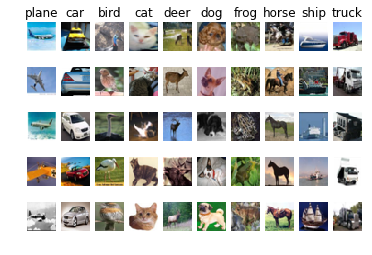

In [155]:
# 可视化部分数据集
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5    # 每个类选则sample_per_class张图像进行显示
for y, cls in enumerate(classes):    # [y, cls] = [0, plane], [1, car] ...
    idxs = np.flatnonzero(ytrain == y)    # 返回训练集中类别是y的图像索引idxs。（flatnonzero函数返回非零元素的位置）
    idxs = np.random.choice(idxs, samples_per_class, replace=False)    # 选择类别y中要显示的图像的索引
    for i, idx in enumerate(idxs):    # [i, idx]是类似[0, 605], [1, 1434], [2, 3292], [3,3092], [4, 22]这样的东西
        plt_idx = i * num_classes + y + 1    # 第y列第i行图像的在画图的坐标系中的坐标
        plt.subplot(samples_per_class, num_classes, plt_idx)    
        plt.imshow(Xtrain[idx].astype('uint8'))    # 显示图像
        plt.axis('off')
        if i == 0:    # 第一行的数据显示标题（类别）
            plt.title(cls)
plt.show()

In [156]:
# 将32x32x3的图像矩阵拉成3072x1的向量
Xtrain = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)
print(Xtrain.shape)
print(Xtest.shape)

(5000, 3072)
(500, 3072)


In [163]:
# 最近邻算法的实现
class nearset_neighbor():
    def __init__(self):
        pass
    # 训练
    def train(self, X, y):
        self.Xtr = X
        self.ytr = y
    # 测试：对测试集中的每个测试样本，遍历训练集中的每一个样本，求出与测试样本距离最近的那个训练样本，它的标签就是测试样本的预测标签
    def test(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)
        for i in range(num_test):
            # 求距离（L1距离）
            distances = np.sum(np.abs(self.Xtr - X[i, :]), axis=1)
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
        return Ypred.reshape(num_test, -1)    # 为了方便计算精确度，将预测结果reshape到和测试标签一样的维度

In [161]:
# 计算精确度的函数
def accuracy(ytest, ypred):
    num_test = ytest.shape[0]
    return (np.abs(ytest - predict) == 0).sum() / num_test

In [162]:
classifier = nearset_neighbor()

# training...
train_time0 = time.time()
classifier.train(Xtrain, ytrain)
train_time = time.time()
print('training time:{:.7f}s'.format(train_time - train_time0))

# testing...
test_time0 = time.time()
predict = classifier.test(Xtest)
test_time = time.time()
print('testing time:{:.7f}s'.format(test_time - test_time0))

# accuracy
acc = accuracy(ytest, predict)
print('accuracy:{:.3f}%'.format(acc*100))

training time:0.0000741s
testing time:10.4404237s
accuracy:22.400%
